In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
!pip install -Uqq fastai
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from fastai.vision.all import *

Mounted at /content/drive
     |████████████████████████████████| 194kB 6.7MB/s 
     |████████████████████████████████| 61kB 8.9MB/s 


<strong><h2>Team:</h2></strong>
<h4>Ashish Bisht<br>Aakanksha Chauhan<br>Mardi Hach<br>Vaishnavi Narayanan<br>Adam Stegall</h4>

<br><br><br><br>

<strong><h2>Data: Panoramic Dental Radiographs</h2></strong>

<br>

<h4>The data was organized in 10 different categories:</h4>

<ul>
    <li><font style="font-size:16px">All teeth with restoration and with a dental appliance AT RS DA</font></li>
    <li><font style="font-size:16px">All teeth with restoration and without a dental appliance AT RS</font></li>
    <li><font style="font-size:16px">All teeth without restoration and with a dental appliance AT DA</font></li>
    <li><font style="font-size:16px">All teeth without restoration and without a dental appliance AT</font></li>
    <li><font style="font-size:16px">Contains dental implant DI</font></li>
    <li><font style="font-size:16px">More than 32 teeth >32</font></li>
    <li><font style="font-size:16px">Missing teeth with restoration and with dental appliance RS DA</font></li>
    <li><font style="font-size:16px">Missing teeth with restoration and without dental appliance RS</font></li>
    <li><font style="font-size:16px">Missing teeth without restoration and with dental appliance DA</font></li>
    <li><font style="font-size:16px">Missing teeth without restoration and without dental appliance </font></li>
</ul><br>

<h4>These categories were broken down into 6 different labels that will be used to classify the images.</h4>

<ol style="font-size:16px">
    <li>All teeth (32) AT</li>
    <li>Missing teeth (less than 32)</li>
    <li>Underwent dental restoration RS</li>
    <li>Contains dental appliance DA</li>
    <li>Contains dental implant DI</li>
    <li>More than 32 teeth. >32</li>
</ol><br>

<h4>As you can see from the following dataframe, images can contain multiple labels.</h4>

In [ ]:
path = '/content/drive/My Drive' # image path
df = pd.read_csv(path + '/sample.csv',delimiter=';') # load train labels to dataframe

In [ ]:
df

,File_Name,Category,AT,RS,DA,DI,>32,Unnamed: 7
0,Tooth XRAY images/cat1/1.jpg,cat1,True,True,True,False,False,NaN
1,Tooth XRAY images/cat1/10.jpg,cat1,True,True,True,False,False,NaN
2,Tooth XRAY images/cat1/11.jpg,cat1,True,True,True,False,False,NaN
3,Tooth XRAY images/cat1/12.jpg,cat1,True,True,True,False,False,NaN
4,Tooth XRAY images/cat1/13.jpg,cat1,True,True,True,False,False,NaN
5,Tooth XRAY images/cat1/14.jpg,cat1,True,True,True,False,False,NaN
6,Tooth XRAY images/cat1/15.jpg,cat1,True,True,True,False,False,NaN
7,Tooth XRAY images/cat1/16.jpg,cat1,True,True,True,False,False,NaN
8,Tooth XRAY images/cat1/17.jpg,cat1,True,True,True,False,False,NaN
9,Tooth XRAY images/cat1/18.jpg,cat1,True,True,True,False,False,NaN


In [ ]:
# df = pd.DataFrame(df)
df.columns = df.columns.str.replace(' ', '')
# df.columns
# df.columns[2]
df['RS'] = df['RS'].astype('bool')
df.dtypes

File_Name     object
Category      object
AT              bool
RS              bool
DA              bool
DI              bool
>32             bool
Unnamed:7    float64
dtype: object

In [ ]:

# df.columns = df.columns.astype(str)
# df.info()
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(df)

df = df.loc[:,['File_Name','AT','RS','DA','DI','>32']]


df.drop_duplicates()
# df['label'] = df.apply(lambda row: row['AT']+" "+row['RS']+" "+row['DA']+" "+row['DI']+" "+row['>32'])
# df['labels'] = (df['AT']==True?'AT':'')+" "+(df['RS']==True?'RS':'')+" "+(df['DA']==True ?'DA':'')+" "+(df['DI']==True?'DI':'')+" "+(df['>32']==True?'>32':'')
labels = []
for index, row in df.iterrows():
    labels.append(
        str('AT ' if row['AT']==True else '')
        +str('RS ' if row['RS']==True else '')
        +str('DA ' if row['DA']==True else '')
        +str('DI ' if row['DI']==True else '')
        +str('>32 ' if row['>32']==True else ''))

df['labels'] = labels
# df['labels'] = ' '.join(str('AT ' if df['AT']==True else '').any(),str('RS ' if df['RS']==True else '').any(),str('DA ' if df['DA']==True else '').any(),str('DI ' if df['DI']==True else '').any(),str('>32' if df['>32 ']==True else '').any()).any()
# df = df[['File_Name','labels']]
# df['labels'].unique()
pd.set_option('display.max_rows', df.shape[0]+1)
print(df)


                          File_Name     AT    RS  ...     DI    >32        labels
0      Tooth XRAY images/cat1/1.jpg   True  True  ...  False  False     AT RS DA 
1     Tooth XRAY images/cat1/10.jpg   True  True  ...  False  False     AT RS DA 
2     Tooth XRAY images/cat1/11.jpg   True  True  ...  False  False     AT RS DA 
3     Tooth XRAY images/cat1/12.jpg   True  True  ...  False  False     AT RS DA 
4     Tooth XRAY images/cat1/13.jpg   True  True  ...  False  False     AT RS DA 
5     Tooth XRAY images/cat1/14.jpg   True  True  ...  False  False     AT RS DA 
6     Tooth XRAY images/cat1/15.jpg   True  True  ...  False  False     AT RS DA 
7     Tooth XRAY images/cat1/16.jpg   True  True  ...  False  False     AT RS DA 
8     Tooth XRAY images/cat1/17.jpg   True  True  ...  False  False     AT RS DA 
9     Tooth XRAY images/cat1/18.jpg   True  True  ...  False  False     AT RS DA 
10    Tooth XRAY images/cat1/19.jpg   True  True  ...  False  False     AT RS DA 
11     Tooth XRA

<br><br><br><br>

<strong><h2>Training</h2></strong>

<h4>By using the class <code>ImageDataLoaders</code>, we were able to create an object to hold our frames. We then utilized the argument <code>item_tfms=Resize()</code> to resize our images prior to training the model.</h4>

In [ ]:
dls = ImageDataLoaders.from_df(df, path, folder='', label_delim=' ', item_tfms=Resize(512), batch_tfms=aug_transforms(size=256), bs=32)

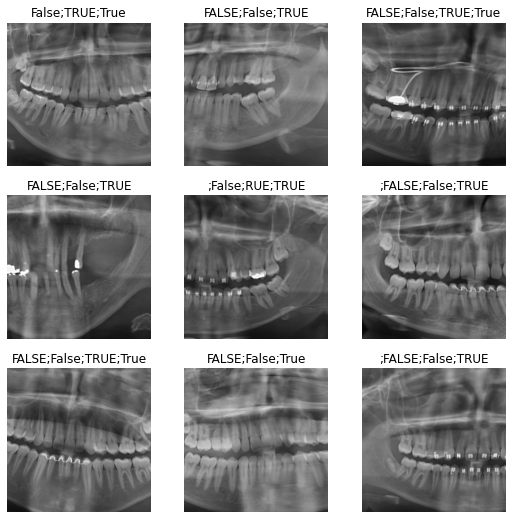

In [ ]:
dls.show_batch() # displays images from the data object

<br>

<h4>Through an example runthrough, we used the same vision model for ours: <code>resnet50</code></h4>

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.5)) # learner object used to train our model

SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.03981071710586548)

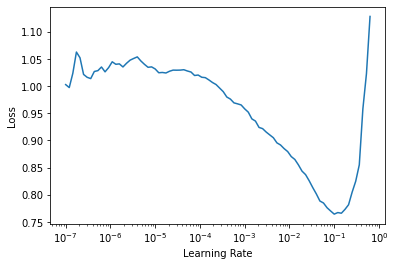

In [ ]:
learn.lr_find() # finds the min and steepest learning rate

In [ ]:
learn.fine_tune(4, 3e-3) # fine tune the learning rate

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.946047,1.393511,0.438889,00:12


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.768162,1.197619,0.458333,00:12
1,0.713684,0.954263,0.591667,00:12
2,0.638055,0.803387,0.677778,00:12
3,0.585608,0.662976,0.736111,00:12


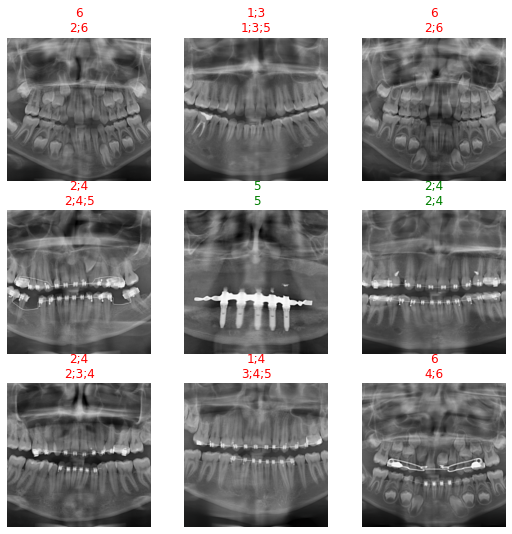

In [ ]:
# display random frames from our model
# green text=correctly classified
# red text=incorrectly classified
learn.show_results(shuffle=True, max_n=9) 

,target,predicted,probabilities,loss
0,1;4,2;3;4;5,"tensor([0.0969, 0.9445, 0.9999, 1.0000, 0.7589, 0.0308])",2.7314813137054443
1,2;4,1;3;4;5,"tensor([0.7304, 0.1979, 0.9892, 1.0000, 0.9043, 0.0084])",1.6351544857025146
2,2,1;3;5,"tensor([0.6854, 0.1506, 0.9412, 0.0230, 0.9178, 0.1270])",1.4234464168548584
3,1;4,2;3;4;5,"tensor([0.2908, 0.8709, 0.9664, 0.9958, 0.6334, 0.1631])",1.3103537559509277
4,6,4;6,"tensor([0.3243, 0.1856, 0.2526, 0.9981, 0.4233, 0.9129])",1.2985451221466064
5,2;4,2;3;4;5,"tensor([0.1076, 0.9832, 0.9951, 1.0000, 0.8064, 0.1302])",1.2036757469177246
6,1;4,3;4;5,"tensor([0.1268, 0.2848, 0.9705, 1.0000, 0.5743, 0.0049])",1.1306195259094238
7,2;4,2;3;4;5,"tensor([0.1546, 0.9835, 0.9920, 0.9999, 0.8087, 0.0937])",1.1276037693023682
8,2;4,2;3;4,"tensor([0.4874, 0.9363, 0.9911, 0.9933, 0.3932, 0.2694])",1.0460224151611328


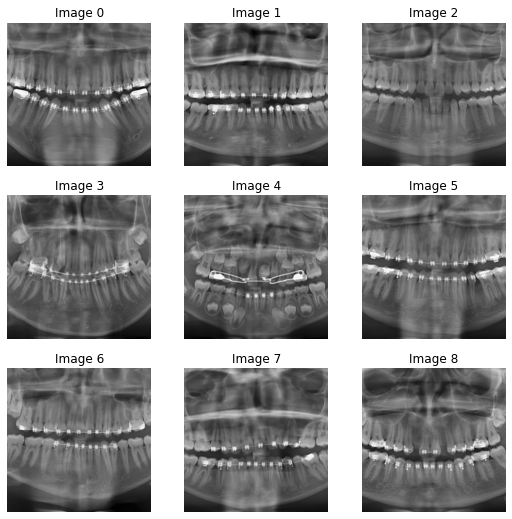

In [ ]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9) # returns frames with the highest loss

In [ ]:
test_frames = pd.read_csv(path + '/test.csv') # load test labels to dataframe

In [ ]:
test_frames

,fname,labels
0,0012.jpg,1 3 4
1,0017.jpg,1 3 4
2,0018.jpg,1 3 4
3,0020.jpg,1 3 4
4,0021.jpg,1 3 4
...,...,...
95,0378.jpg,2
96,0380.jpg,2
97,0391.jpg,2
98,0392.jpg,2


In [ ]:
def getPred(learner):
    """Returns prediction for random test frame

    Args
    ------
      learner: learner object

    Returns
    -------
      fname: string; name of frame
      label: string; frame label
      predict: tuple; calls predict method from learner object
        1. predicted label(s) for frame
        2. decoded prediction
        3. fully decoded prediction
    
    """
    idx = np.random.randint(0, len(test_frames), dtype=int)
    fname = test_frames['fname'].iloc[idx]
    label = test_frames['labels'].iloc[idx]
    print("Frame: " + fname)
    print("Label: " + label + "\n")
    print("Prediction: ")
    return learner.predict(path + '/test/' + fname)

In [ ]:
# predicts a random frame from the test set
getPred(learn)

Frame: 0032.jpg
Label: 1 3 4

Prediction: 


((#4) ['1','3','4','5'],
 TensorImage([ True, False,  True,  True,  True, False]),
 TensorImage([0.5487, 0.2990, 0.9883, 0.9963, 0.5562, 0.0614]))

<br><br><br><br>

<strong><h2>Second Model</h2></strong>

<h4>Through some research, we have also learned that the vision model <code>densenet161</code> was also used frequently with multi-label classification problems.</h4>

In [ ]:
# clear old learner to free up GPU memory
del learn
torch.cuda.empty_cache()

In [ ]:
learn = cnn_learner(dls, densenet161, metrics=partial(accuracy_multi, thresh=0.5)) # learner object used to train our model

SuggestedLRs(lr_min=0.02089296132326126, lr_steep=0.033113110810518265)

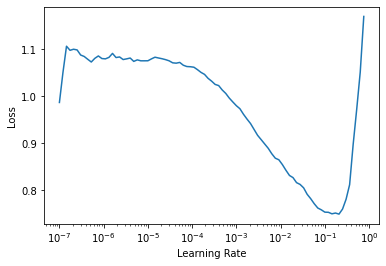

In [ ]:
learn.lr_find() # finds the min and steepest learning rate

In [ ]:
learn.fine_tune(4, 3e-3) # fine tune the learning rate

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.920092,0.925903,0.566667,00:16


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.792406,0.738337,0.652778,00:15
1,0.669871,0.846482,0.644444,00:14
2,0.592527,0.614469,0.716667,00:14
3,0.544103,0.614962,0.730556,00:14


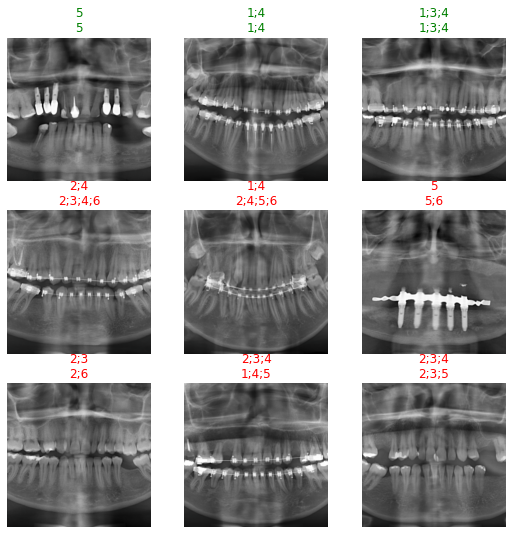

In [ ]:
# display random frames from our model
# green text=correctly classified
# red text=incorrectly classified
learn.show_results(shuffle=True, max_n=9) 

,target,predicted,probabilities,loss
0,2,5;6,"tensor([5.3676e-02, 1.4721e-01, 9.8702e-04, 1.6630e-03, 9.9900e-01, 8.2961e-01])",1.7754042148590088
1,2;3;4,2;3;5,"tensor([5.3628e-02, 8.5862e-01, 6.7036e-01, 3.9029e-04, 8.2289e-01, 1.0699e-01])",1.7167105674743652
2,1;3,1;5;6,"tensor([0.7540, 0.0049, 0.0027, 0.0661, 0.6165, 0.9343])",1.6572246551513672
3,2;3;4,1;4,"tensor([0.9921, 0.1355, 0.1191, 1.0000, 0.1214, 0.2289])",1.559380054473877
4,2;3;4,1;4;5,"tensor([0.8679, 0.1737, 0.0309, 0.9999, 0.8249, 0.2867])",1.5551447868347168
5,2;3;4,1;3;4;6,"tensor([0.9338, 0.0192, 0.6380, 0.9996, 0.3482, 0.6073])",1.4132328033447266
6,2;3,1;5,"tensor([0.9861, 0.1943, 0.3913, 0.0249, 0.5597, 0.0503])",1.2910635471343994
7,2;4,1;4,"tensor([0.9881, 0.0642, 0.0373, 1.0000, 0.3175, 0.0337])",1.2721790075302124
8,2;4,1;4;6,"tensor([0.9487, 0.2669, 0.1651, 0.9999, 0.2951, 0.8581])",1.1289899349212646


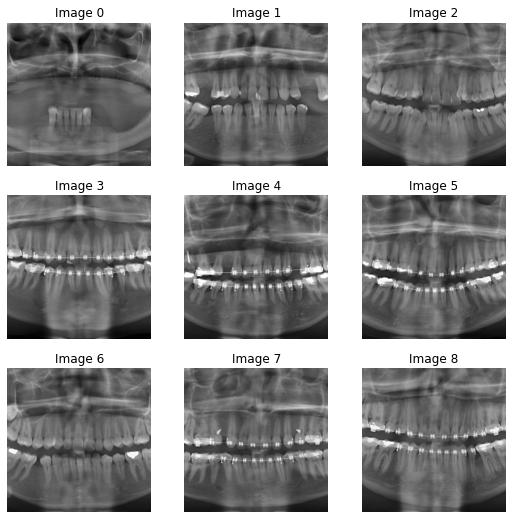

In [ ]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9) # returns frames with the highest loss

In [ ]:
getPred(learn)

Frame: 0138.jpg
Label: 1

Prediction: 


((#1) ['1'],
 TensorImage([ True, False, False, False, False, False]),
 TensorImage([0.9682, 0.0491, 0.0992, 0.0071, 0.1622, 0.4541]))